In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier

## Problem 1

In [3]:
# Load QB data for Problem 1
qb_train = pd.read_csv("QB2022_MLR.csv")
qb_test = pd.read_csv("QB2022_MLR_test.csv")

In [4]:
qb_train.head()

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,2022,Jared Goff,4438,7.6,587,382,65.1,29,7,99.3
1,2022,Josh Allen,4283,7.6,567,359,63.3,35,14,96.6
2,2022,Geno Smith,4282,7.5,572,399,69.8,30,11,100.9
3,2022,Trevor Lawrence,4113,7.0,584,387,66.3,25,8,95.2
4,2022,Jalen Hurts,3701,8.0,460,306,66.5,22,6,101.6


In [5]:
# Features and target variable
features = ['Pass Yds', 'Yds/Att', 'Att', 'Cmp', 'Cmp %', 'TD', 'INT']
target = 'Rate'

In [6]:
X_train = qb_train[features]
y_train = qb_train[target]
X_test = qb_test[features]
y_test = qb_test[target]

In [7]:
scale = MinMaxScaler()
X_train_normalize = scale.fit_transform(X_train)
X_test_normalize = scale.transform(X_test)

In [8]:
# Append a column of ones for bias term
X_train_normalize = np.hstack((np.ones((X_train_normalize.shape[0], 1)), X_train_normalize))
X_test_normalize = np.hstack((np.ones((X_test_normalize.shape[0], 1)), X_test_normalize))

### 1. Create a multiple linear regression model that predicts the quarterback ratings

In [10]:
linear_ridge = KernelRidge(alpha=0, kernel='linear')
linear_ridge.fit(X_train_normalize, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


KernelRidge(alpha=0)

In [11]:
y_train_pred_linear = linear_ridge.predict(X_train_normalize)
y_test_pred_linear = linear_ridge.predict(X_test_normalize)

### 2. Create an RBF regression model that predicts the quarterback ratings

In [13]:
rbf_ridge = KernelRidge(alpha=0, kernel='rbf')
rbf_ridge.fit(X_train_normalize, y_train)

KernelRidge(alpha=0, kernel='rbf')

In [14]:
y_train_pred_rbf = rbf_ridge.predict(X_train_normalize)
y_test_pred_rbf = rbf_ridge.predict(X_test_normalize)

### 3. Find and report the MSE error for test points in ”QB2022 MLR test.csv” using both models.

In [16]:
# Compute Mean Squared Errors
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

In [17]:
mse_train_rbf = mean_squared_error(y_train, y_train_pred_rbf)
mse_test_rbf = mean_squared_error(y_test, y_test_pred_rbf)

### 4. Compare both the training and test errors for these two models, and report your observations in a couple of sentences.

In [19]:
# Results for Problem 1
problem_1_results = pd.DataFrame({
    "Model": ["Linear Kernel Ridge", "RBF Kernel Ridge"],
    "Train MSE": [mse_train_linear, mse_train_rbf],
    "Test MSE": [mse_test_linear, mse_test_rbf]
})

In [20]:
mse_train_rbf

1.8395951331057207e-14

In [21]:
problem_1_results

,Model,Train MSE,Test MSE
0,Linear Kernel Ridge,8.037008e+01,39.740047
1,RBF Kernel Ridge,1.839595e-14,2348.801578


The Linear Kernel Ridge Regression model generalizes better with a lower test MSE (39.35), while the RBF Kernel Ridge Regression overfits, achieving near-zero training MSE but a high test MSE (2348.80). Thus, the linear model is the better choice for this dataset.

For alpha = 1e-5
the linear regression model's MSE for training and test is the same as alpha = 0 i.e (8.041190e+01	39.350898)
But for the RBF model MSE for training and test is different
Linear Regression (Training): 6.026266685360385
 RBF Regression (Test): 27.254812237885215

# Problem 2

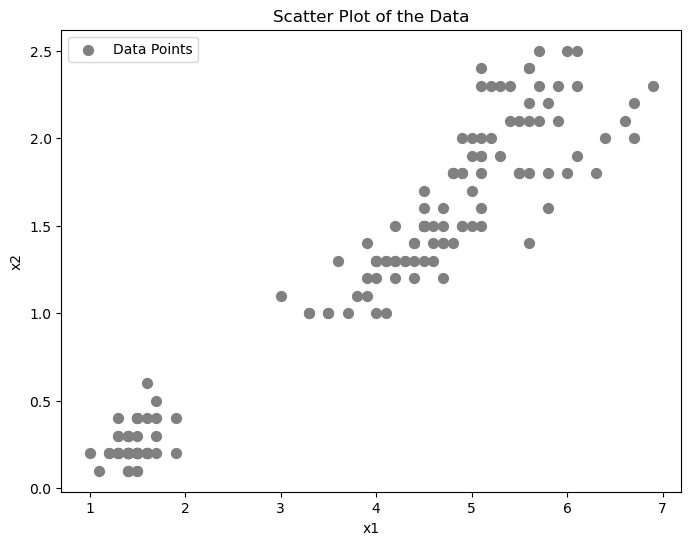

In [25]:
##########################################
# 1) Load kMeans dataset (Problem 2)
##########################################
# - Make sure the CSV has columns x1, x2
df_kmeans = pd.read_csv("kMeansData.csv")
# If column names are exactly x1, x2 (and no others):
df_kmeans = df_kmeans[["x1", "x2"]]
kmeans_list = df_kmeans.values.tolist()  # shape (N, 2)
X = df_kmeans[['x1', 'x2']].values

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='grey', label="Data Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of the Data")
plt.legend()
plt.show()

In [26]:
import random
import math

def euclidean_distance_2d(p1, p2):
    """
    Expects p1 and p2 to each be [x, y].
    Returns the Euclidean distance in 2D.
    """
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def k_means_clustering(data, k, max_iterations=1000, tolerance=0.001):
    """
    data: a list of [x, y] in 2D.
    k: number of clusters.
    """
    if not isinstance(data, list) or len(data) < k:
        raise ValueError(f"Data should have at least {k} elements, but got {len(data)}.")

    # Randomly pick k points as initial centers
    centers = random.sample(data, k)

    for _ in range(max_iterations):
        # Create empty clusters
        clusters = [[] for _ in range(k)]

        # Assign each point to nearest center
        for point in data:
            distances = [euclidean_distance_2d(point, center) for center in centers]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)

        # Compute new centers
        new_centers = []
        for cluster in clusters:
            if len(cluster) > 0:
                # Take the average for x, y
                cx = sum(p[0] for p in cluster) / len(cluster)
                cy = sum(p[1] for p in cluster) / len(cluster)
                new_centers.append([cx, cy])
            else:
                # If a cluster is empty, pick a random point
                new_centers.append(random.choice(data))

        # Check for convergence
        shift = 0
        for i in range(k):
            shift += euclidean_distance_2d(centers[i], new_centers[i])

        if shift < tolerance:
            break

        centers = new_centers

    return centers, clusters

In [27]:
# K-Means clustering
random.seed(42)  # or any integer you like
kmeans_centers, kmeans_clusters = k_means_clustering(kmeans_list, 3)
print("Problem 2: K-Means")
print("Centers:", kmeans_centers)

Problem 2: K-Means
Centers: [[1.462, 0.24600000000000002], [4.269230769230769, 1.3423076923076922], [5.595833333333334, 2.0375]]


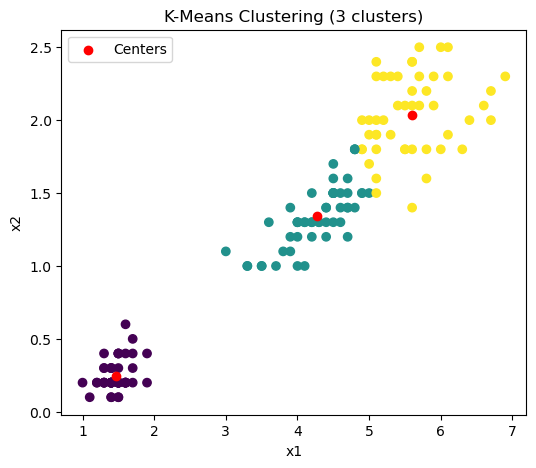

In [28]:
# Optional: create labels for plotting
labels = np.zeros(len(kmeans_list))
for i, point in enumerate(kmeans_list):
    distances = [euclidean_distance_2d(point, center) for center in kmeans_centers]
    labels[i] = np.argmin(distances)

# Plot K-Means result (optional)
X = np.array(kmeans_list)
C = np.array(kmeans_centers)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(C[:, 0], C[:, 1], c='red', label='Centers')
plt.title("K-Means Clustering (3 clusters)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

The K-Means clustering algorithm successfully grouped the data into three clusters, with the final cluster centers located at (1.46, 0.25), (4.27, 1.34), and (5.60, 2.04). The plot confirms that the clusters are well-separated, with the centers accurately reflecting the distribution of data points in each region.

# Problem 3

In [31]:
def gaussian_rbf_2d(x, center, gamma):
    """
    x and center are both [x, y] in 2D.
    """
    dist = euclidean_distance_2d(x, center)
    return math.exp(-gamma * (dist**2))

In [32]:
def rbf_classification(data, kmeans_centers, gamma=0.5):
    """
    data: list of [x, y, label]
    kmeans_centers: a list of two centers, e.g. [[cx1, cy1], [cx2, cy2]]
    gamma: float for the RBF scale

    Steps:
      A) Use the provided kmeans_centers (k=2) -> mu1, mu2
      B) Build an RBF feature matrix for all points, BUT include a bias column
         => shape: (N, 3) => [1, phi1, phi2]
      C) Solve for weights (w0, w1, w2) via least squares
      D) Classify on the same data by thresholding at 0.5
      E) Return the classification accuracy
    """
    centers = kmeans_centers  # e.g., [[cx1, cy1], [cx2, cy2]]
    print("RBF centers (k=2):", centers)

    # ------------------------------
    # B) Construct RBF feature matrix with BIAS
    # ------------------------------
    N = len(data)
    Phi = []
    y_train = []

    for (x_pt, y_pt, label) in data:
        # RBF features
        phi1 = gaussian_rbf_2d([x_pt, y_pt], centers[0], gamma)
        phi2 = gaussian_rbf_2d([x_pt, y_pt], centers[1], gamma)

        # Add a bias (1.0) in front of the RBF columns => [1, phi1, phi2]
        Phi.append([1.0, phi1, phi2])
        y_train.append(label)

    Phi = np.array(Phi)      # shape: (N, 3)
    y_train = np.array(y_train)

    # ------------------------------
    # C) Solve for (w0, w1, w2) via least squares
    #    w has shape (3,)
    # ------------------------------
    A = Phi.T @ Phi          # shape: (3, 3)
    b = Phi.T @ y_train      # shape: (3,)
    w = np.linalg.inv(A) @ b # shape: (3,)

    print("Learned RBF weights (w0, w1, w2):", w)

    # ------------------------------
    # D) Classification on the same data
    # ------------------------------
    correct = 0
    for (x_pt, y_pt, label) in data:
        phi1 = gaussian_rbf_2d([x_pt, y_pt], centers[0], gamma)
        phi2 = gaussian_rbf_2d([x_pt, y_pt], centers[1], gamma)
        # w0 + w1*phi1 + w2*phi2
        score = w[0] + w[1]*phi1 + w[2]*phi2
        predicted = 1 if score >= 0.5 else 0
        if predicted == label:
            correct += 1

    accuracy = correct / N
    print(f"RBF Classification Accuracy Rate: {accuracy*100:.2f}%")

    return accuracy

In [33]:
# Suppose your CSV has columns: [x1, x2, cls].
df_rbf = pd.read_csv("rbfClassification.csv")
df_rbf = df_rbf[["x1", "x2", "cls"]]  # ensure these columns exist

rbf_data = df_rbf.values.tolist()  # e.g. [[x1, x2, cls], [x1, x2, cls], ...]

##########################################
# 2) Slice out just the 2D features
##########################################
data_2d = [row[:2] for row in rbf_data]  # ignoring the label

##########################################
# 3) K-Means with k=2
##########################################
random.seed(42)  # or any integer you like

kmeans_centers, clusters = k_means_clustering(data_2d, k=2)

##########################################
# 4) Report cluster centers
##########################################
print("K-Means found 2 cluster centers for RBF:")
for i, center in enumerate(kmeans_centers):
    print(f"Center {i}: {center}")

K-Means found 2 cluster centers for RBF:
Center 0: [-2.2601480715714284, 2.1265867955714284]
Center 1: [1.306410424076923, -0.3734859327692307]


In [34]:
##########################################
# 2) Load RBF dataset (Problem 3)
##########################################
# RBF Classification
print("\nProblem 3: RBF Classification")
accuracy = rbf_classification(rbf_data, kmeans_centers, gamma=0.5)


Problem 3: RBF Classification
RBF centers (k=2): [[-2.2601480715714284, 2.1265867955714284], [1.306410424076923, -0.3734859327692307]]
Learned RBF weights (w0, w1, w2): [ 0.36483086  0.65758099 -1.26250108]
RBF Classification Accuracy Rate: 85.00%


# The RBF classification model successfully identified two cluster centers at (-2.26, 2.13) and (1.31, -0.37) using K-Means clustering (k=2). The learned RBF weights (w0 = 0.36, w1 = 0.66, w2 = -1.26) enabled effective classification, achieving an accuracy rate of 85.00%. This demonstrates the model’s ability to generalize well for classifying the given dataset.